# Chapter 9 — Support Vector Machines

In [1]:
library("e1071")
library("foreach")
library("ISLR")
library("ROCR")

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



## Lab: Support Vector Machines

### Support Vector Classifier

The support vector classifier classifies with the hyperplane. The hyperplane is chosen with the optimization problem
$$
\underset{
    \beta_0,\beta_1,\dots,\beta_p,
    \epsilon_1,\dots,\epsilon_n,M
  }{\text{maximize}}
M\\
\text{subject to}
\sum_{j=1}^{p} \beta_j^2 = 1,\\
y_i \left(
        \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} 
        + \dots + \beta_p x_{ip}
    \right)
    \geq M \left( 1 - \epsilon_i \right), \\
\epsilon_i \geq 0, \sum_{i=1}^n \epsilon_i \leq C,
$$
where $C$ is a nonnegative tuning parameter.

In the `e1071` library, the SVC is used when the argument `kernel = "linear"` is used. This functin uses a slight different formulation from the above formula for the support vector classifier. The `cost` argument specify the cost of a violation to the margin. A small `cost` the margins will be wide and many support vector will be on the margin or will violate the margin. A large `cost` implies in a narrow margin with few violations.

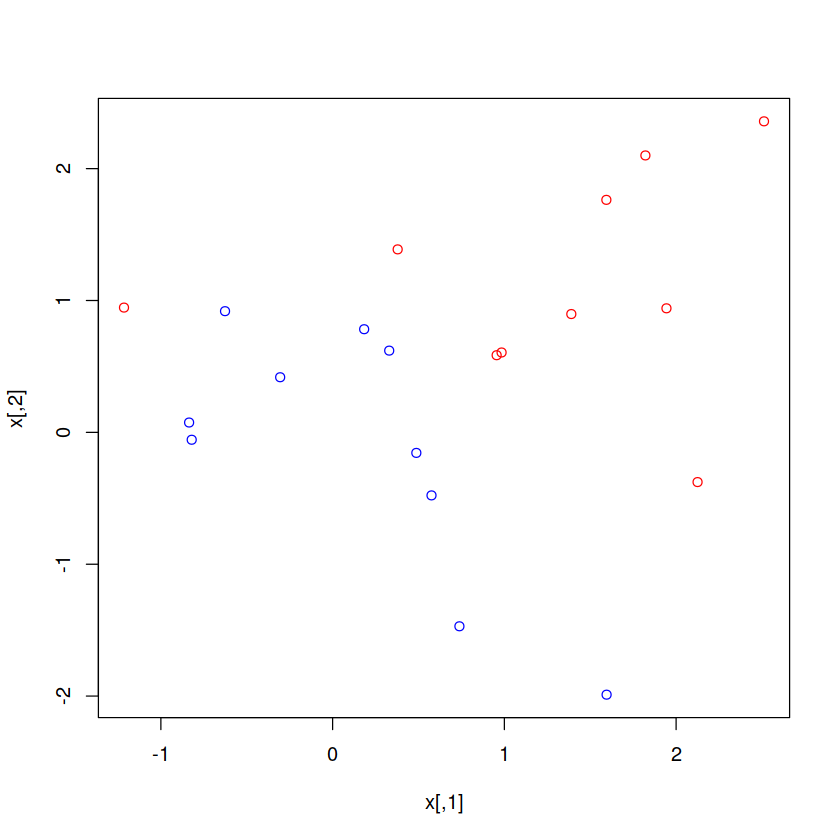

In [2]:
set.seed(1)
x <- matrix(rnorm(20 * 2), ncol = 2)
y <- c(rep(-1, 10), rep(1, 10))
x[y == 1, ] <- x[y == 1, ] + 1
plot(x, col = (3 - y))

Not linearly separable.

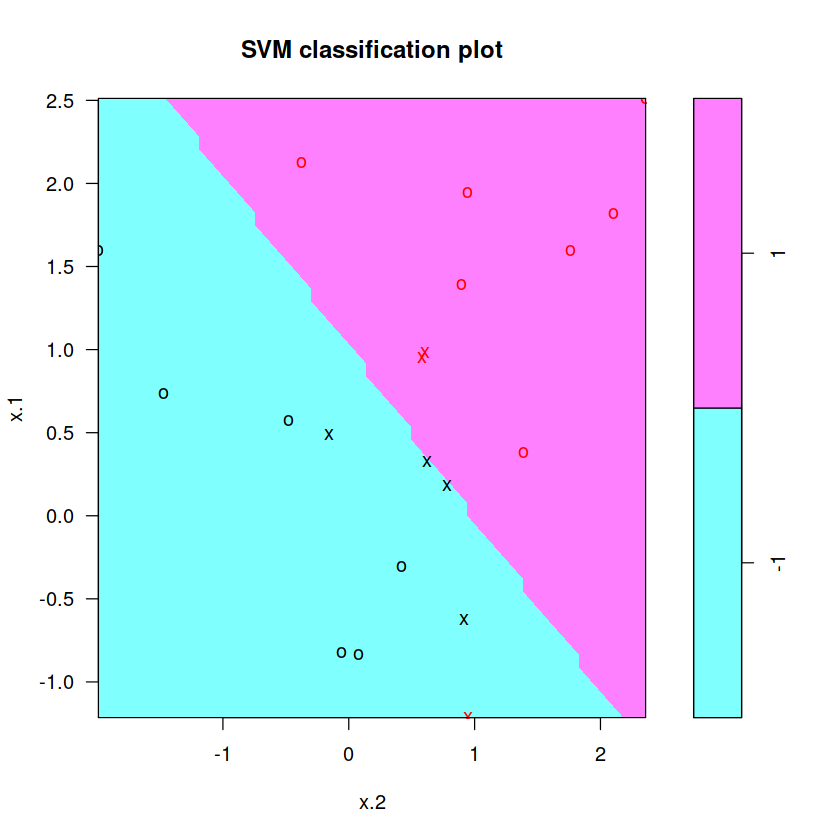

In [3]:
dat <- data.frame(x = x, y = as.factor(y))
svm.fit <- svm(y ~ ., data = dat, kernel = "linear",
               cost = 10, scale = FALSE)
plot(svm.fit, dat)

In [4]:
svm.fit$index

[1]  1  2  5  7 14 16 17

In [5]:
summary(svm.fit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




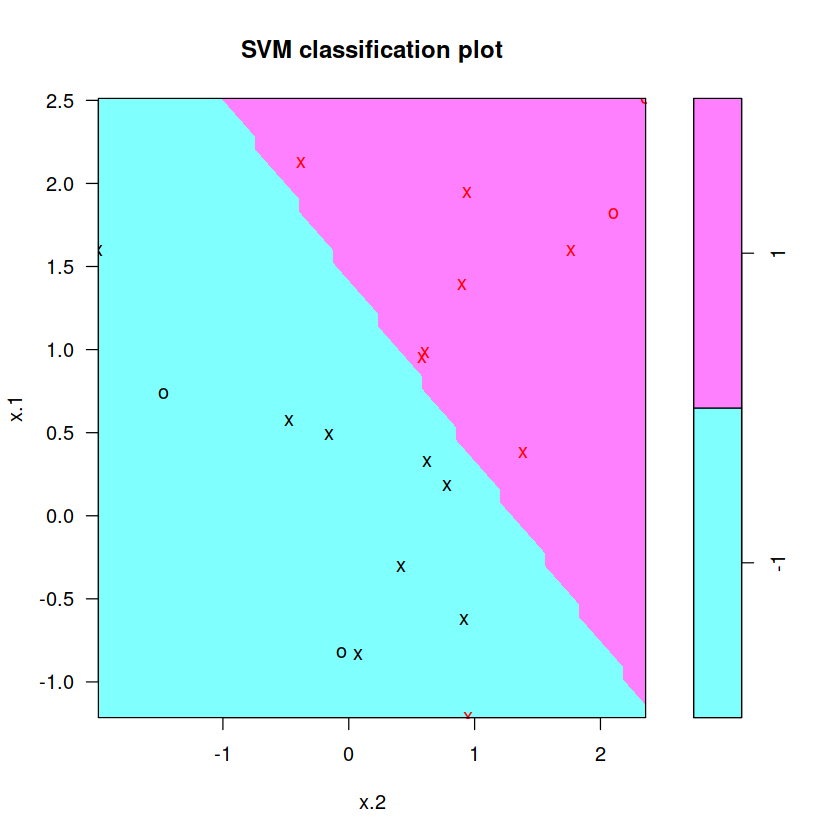

In [6]:
fit <- svm(y ~ ., data = dat, kernel = "linear", 
           cost = 0.1, scale = FALSE)
plot(fit, dat)

Larger number of support vectors.

In [7]:
fit$index

[1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20

In [8]:
set.seed(1)
tune.out <- tune(svm, y ~ ., data = dat, kernel = "linear",
                 ranges = list(cost = c(0.001, 0.01, 0.1,
                                        1, 5, 10, 100)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.1 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.70  0.4216370
2 1e-02  0.70  0.4216370
3 1e-01  0.10  0.2108185
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229


In [9]:
bestmod <- tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




In [10]:
xtest <- matrix(rnorm(20 * 2), ncol = 2)
ytest <- sample(c(-1, 1), 20, replace = TRUE)
xtest[ytest == 1, ] <- xtest[ytest == 1, ] + 1
testdat <- data.frame(x = xtest, y = as.factor(ytest))
ypred <- predict(bestmod, testdat)
table(predict = ypred, truth = testdat$y)

       truth
predict -1  1
     -1 11  1
     1   0  8

In [11]:
fit <- svm(y ~ ., data = dat, kernel = "linear",
           cost = 0.01, scale = FALSE)
ypred <- predict(fit, testdat)
table(predict = ypred, truth = testdat$y)

       truth
predict -1  1
     -1 11  2
     1   0  7

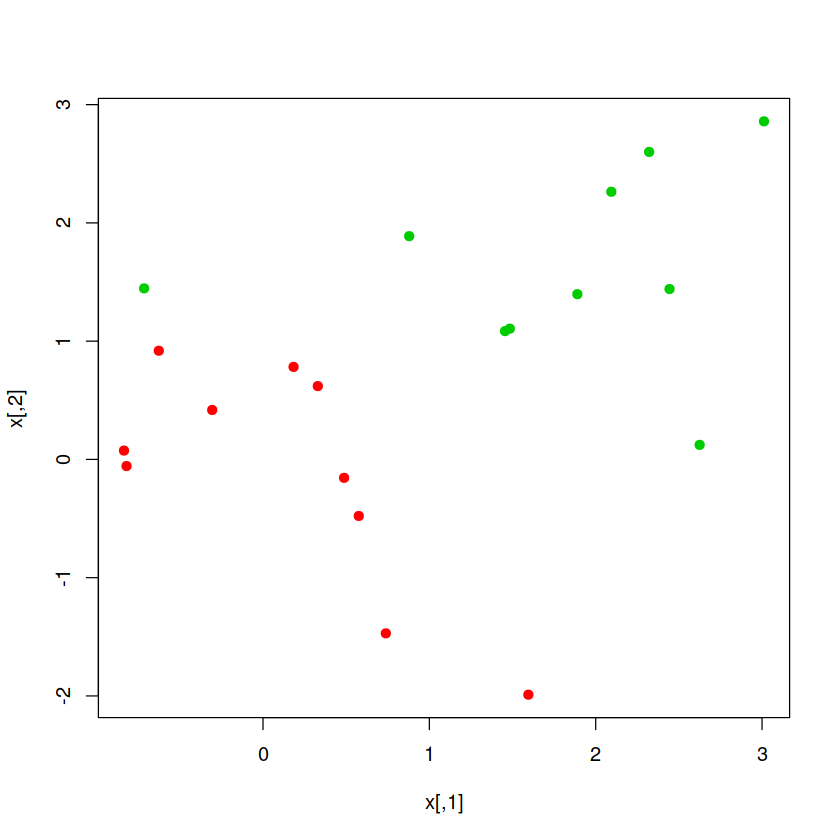

In [12]:
x[y == 1, ] <- x[y == 1, ] + 0.5
plot(x, col = (y + 5) / 2, pch = 19)

In [13]:
dat <- data.frame(x = x, y = as.factor(y))
fit <- svm(y ~ ., data = dat, kernel = "linear", cost = 1e5)
summary(fit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 
      gamma:  0.5 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1




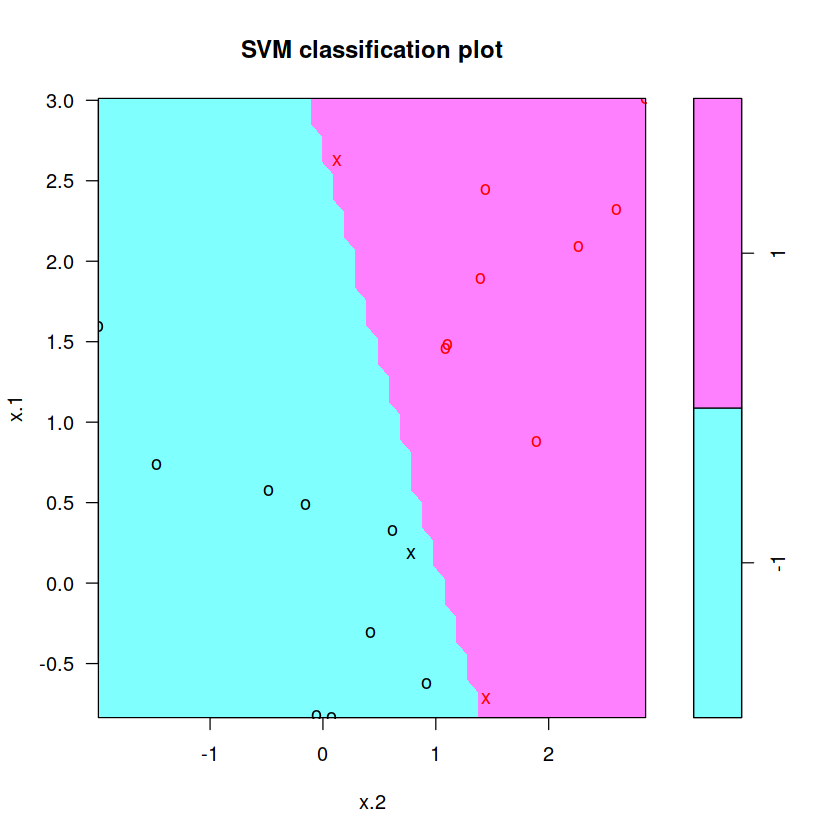

In [14]:
plot(fit, dat)

In [15]:
fit <- svm(y ~ ., data = dat, kernel = "linear", cost = 1)
summary(fit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




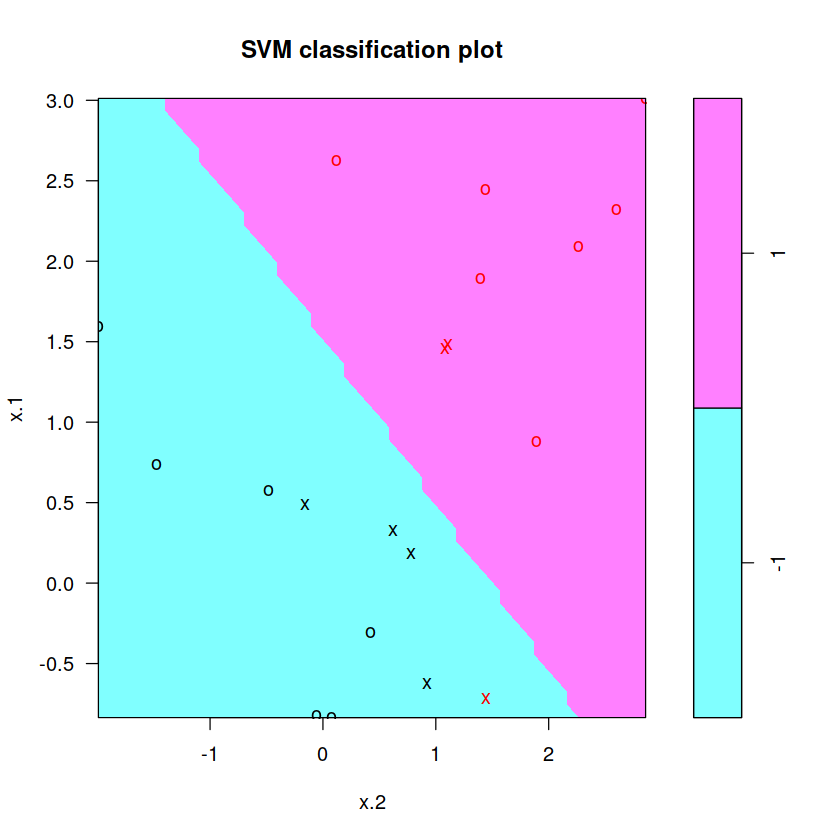

In [16]:
plot(fit, dat)

### Support Vector Machine

A support vector machine using a non-linear kernel, we once again use the `svm()` function. For the `kernel = "polynomial"` we have to specify a `degree` $d$ for the polynomial kernel in
$$
K\!\left(x_i, x_{i'}\right) =
\left(
    1 + \sum_{j=1}^p x_{ij} x_{i'j}
\right)^{\!d}.
$$
For `kernel = "radial"` we have to specify the `gamma` $\gamma$ positive constant of the radial kernel 
$$
K\!\left(x_i, x_{i'}\right) =
\text{exp}\left(
    - \gamma \sum_{j=1}^p \left( x_{ij} - x_{i'j} \right)^2
\right)^{\!d}.
$$


In [17]:
set.seed(1)

x <- matrix(rnorm(200 * 2), ncol = 2)
x[1:100, ] <- x[1:100, ] + 2
x[101:150, ] <- x[101:150, ] - 2
y <- c(rep(1, 150), rep(2, 50))
dat <- data.frame(x = x, y = as.factor(y))

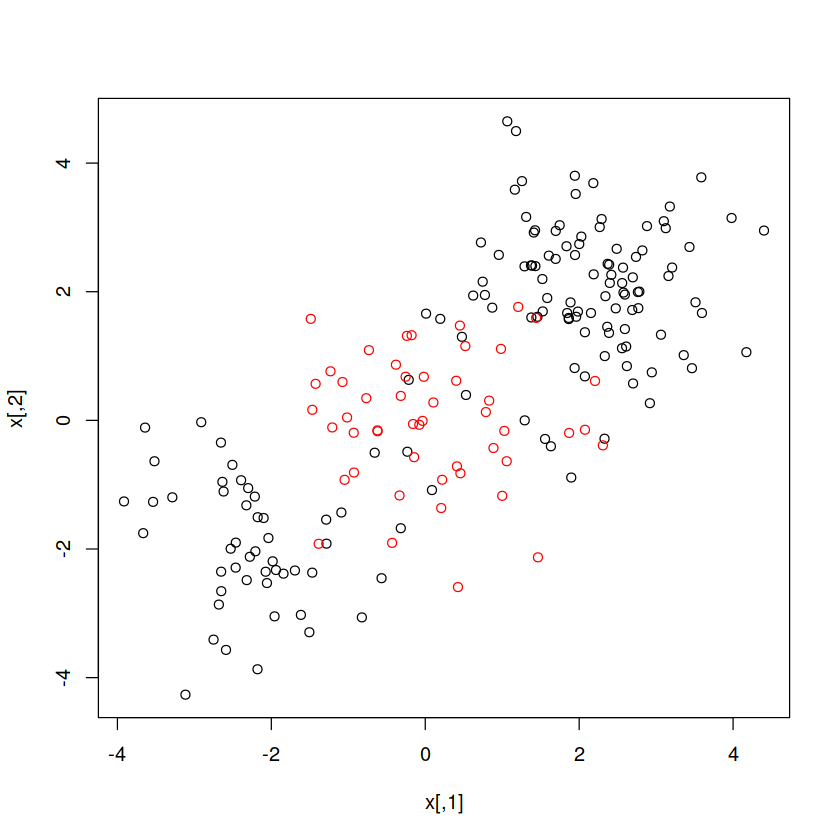

In [18]:
plot(x, col = y)

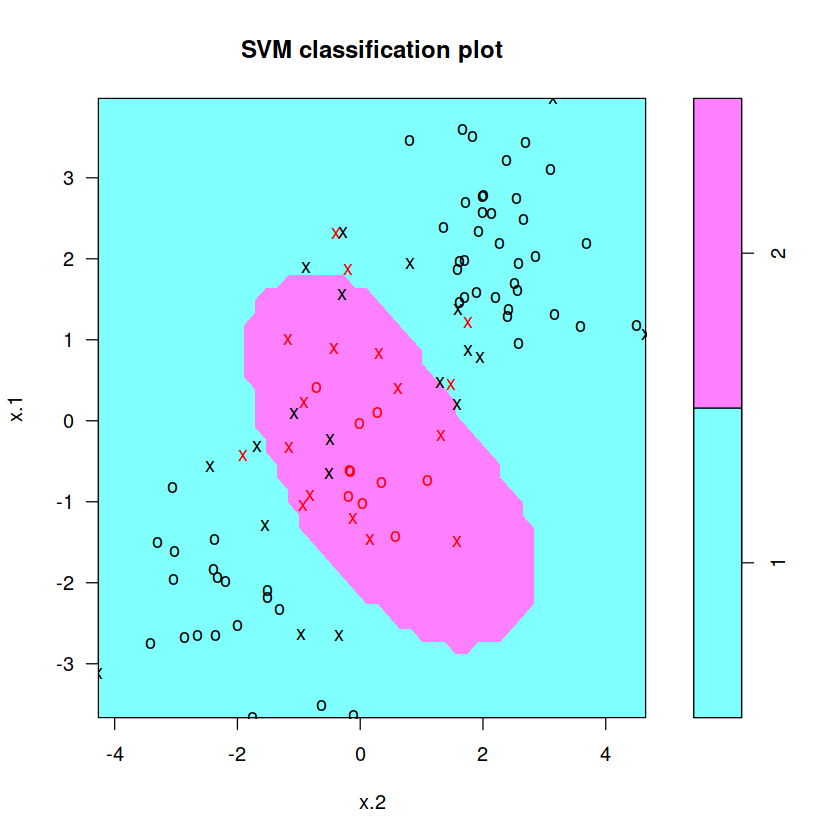

In [19]:
train <- sample(200, 100)
fit <- svm(y ~ ., data = dat[train, ], kernel = "radial",
           gamma = 1, cost = 1)
plot(fit, dat[train, ])

In [20]:
summary(fit)


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 

Number of Support Vectors:  37

 ( 17 20 )


Number of Classes:  2 

Levels: 
 1 2




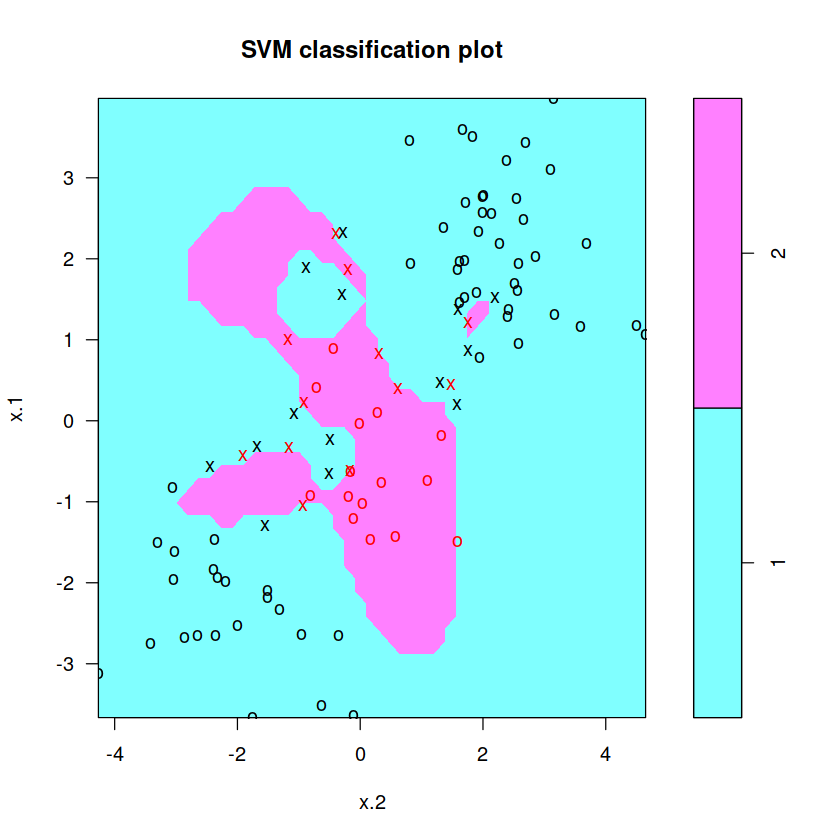

In [21]:
fit <- svm(y ~ ., data = dat[train, ], kernel = "radial",
           gamma = 1, cost = 1e5)
plot(fit, dat[train, ])

In [22]:
set.seed(1)
tune.out <- tune(
    svm, y ~ ., data = dat[train, ], kernel = "radial",
    ranges = list(
        cost = c(0.1, 1, 10, 100, 1000),
        gamma = c(0.5, 1, 2, 3, 4)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1     2

- best performance: 0.12 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.27 0.11595018
2  1e+00   0.5  0.13 0.08232726
3  1e+01   0.5  0.15 0.07071068
4  1e+02   0.5  0.17 0.08232726
5  1e+03   0.5  0.21 0.09944289
6  1e-01   1.0  0.25 0.13540064
7  1e+00   1.0  0.13 0.08232726
8  1e+01   1.0  0.16 0.06992059
9  1e+02   1.0  0.20 0.09428090
10 1e+03   1.0  0.20 0.08164966
11 1e-01   2.0  0.25 0.12692955
12 1e+00   2.0  0.12 0.09189366
13 1e+01   2.0  0.17 0.09486833
14 1e+02   2.0  0.19 0.09944289
15 1e+03   2.0  0.20 0.09428090
16 1e-01   3.0  0.27 0.11595018
17 1e+00   3.0  0.13 0.09486833
18 1e+01   3.0  0.18 0.10327956
19 1e+02   3.0  0.21 0.08755950
20 1e+03   3.0  0.22 0.10327956
21 1e-01   4.0  0.27 0.11595018
22 1e+00   4.0  0.15 0.10801234
23 1e+01   4.0  0.18 0.11352924
24 1e+02   4.0  0.21 0.08755950
25 1e+03   4.0  0.24 0

In [23]:
table(true = dat[-train, "y"], 
      pred = predict(tune.out$best.model,
                     newdata = dat[-train, ]))

    pred
true  1  2
   1 74  3
   2  7 16

### ROC Curves

In [24]:
rocplot <- function(pred, truth, ...) {
    predob <- prediction(pred, truth)
    perf <- performance(predob, "tpr", "fpr")
    plot(perf, ...)
}

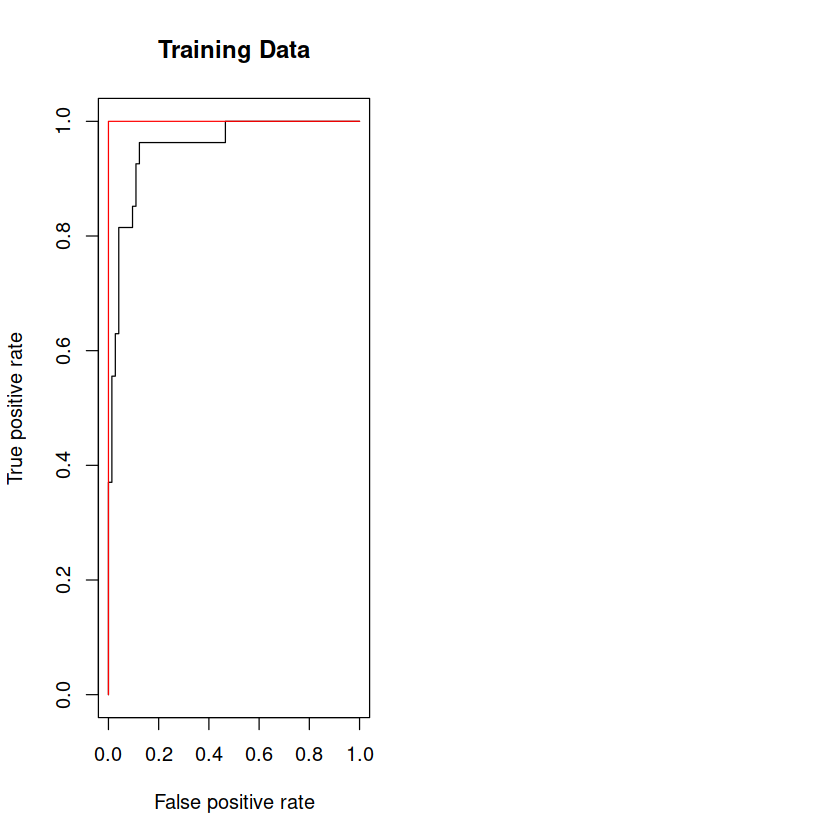

In [25]:
par(mfrow = c(1, 2))
fit.opt <- svm(y ~ ., data = dat[train, ], kernel = "radial",
               gamma = 2, cost = 1, decision.values = TRUE)
pred <- predict(fit.opt, dat[train, ], decision.values = TRUE)
fitted <- attributes(pred)$decision.values
rocplot(fitted, dat[train, "y"], main = "Training Data")

fit.flex <- svm(y ~ ., data = dat[train, ], kernel = "radial",
                gamma = 50, cost = 1, decision.values = TRUE)
pred <- predict(fit.flex, dat[train, ], decision.values = TRUE)
fitted <- attributes(pred)$decision.values
rocplot(fitted, dat[train, "y"], add = TRUE, col = "red")

### SVM with Multiple Classes

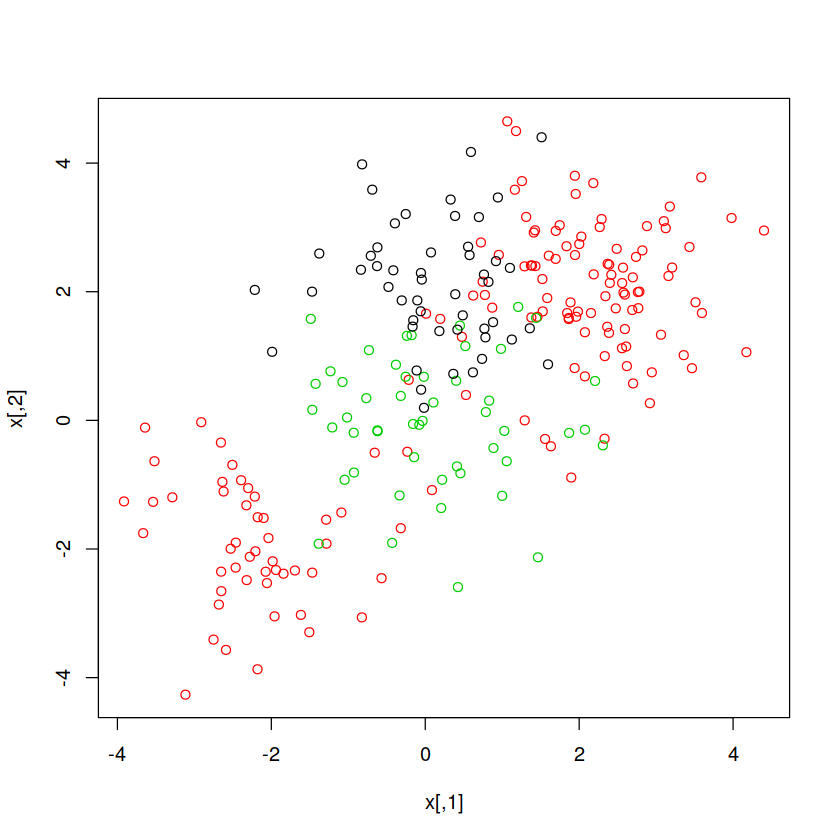

In [26]:
set.seed(1)
x <- rbind(x, matrix(rnorm(50 * 2), ncol = 2))
y <- c(y, rep(0, 50))
x[y == 0, 2] <- x[y == 0, 2] + 2
dat <- data.frame(x = x, y = as.factor(y))
par(mfrow = c(1, 1))
plot(x, col = (y + 1))

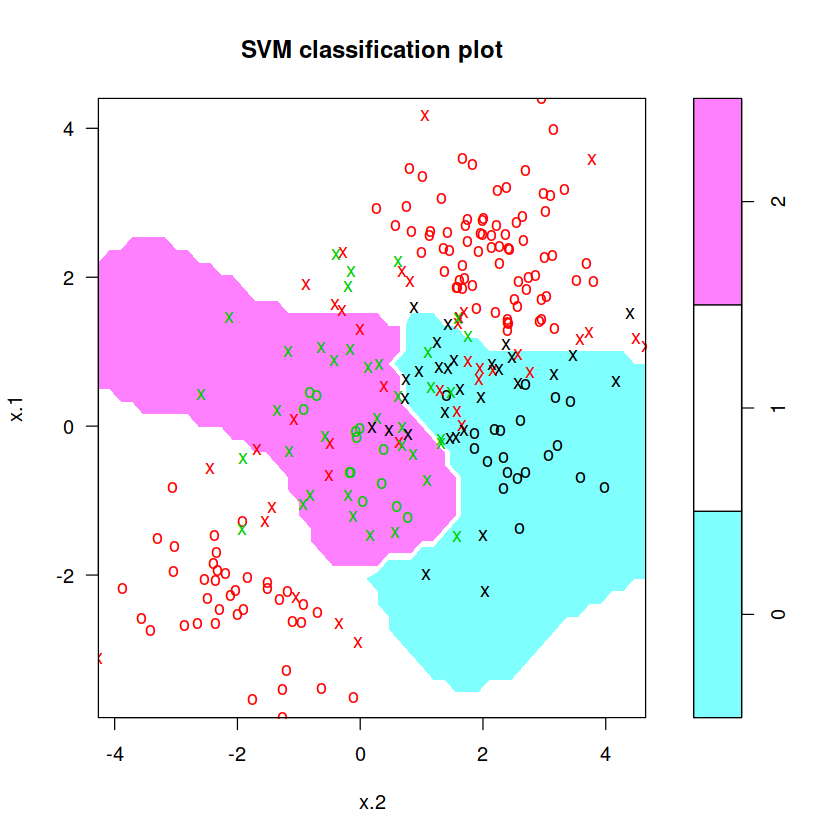

In [27]:
fit <- svm(y ~ ., data = dat, kernel = "radial",
           cost = 10, gamma = 1)
plot(fit, dat)

### Application to Gene Expression Data

**Khan** data set.

In [28]:
names(Khan)

[1] "xtrain" "xtest"  "ytrain" "ytest"

In [29]:
dim(Khan$xtrain)

[1]   63 2308

In [30]:
dim(Khan$xtest)

[1]   20 2308

In [31]:
length(Khan$ytrain)

[1] 63

In [32]:
length(Khan$ytest)

[1] 20

2,308 genes. 63 and 20 observations on train and test, in that order.

In [33]:
table(Khan$ytrain)


 1  2  3  4 
 8 23 12 20 

In [34]:
table(Khan$ytest)


1 2 3 4 
3 6 6 5 

In this data set, there are a very large number of features relative to the nubmer of observations. This suggests that we should use a linear kernel, because the additional compressity that will result from using a polynomial or radial kernel is unnecessary.

In [35]:
dat <- data.frame(x = Khan$xtrain,
                   y = as.factor(Khan$ytrain))
fit <- svm(y ~ ., data = dat, kernel = "linear", cost = 10)
summary(fit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.0004332756 

Number of Support Vectors:  58

 ( 20 20 11 7 )


Number of Classes:  4 

Levels: 
 1 2 3 4




In [36]:
table(fit$fitted, dat$y)

   
     1  2  3  4
  1  8  0  0  0
  2  0 23  0  0
  3  0  0 12  0
  4  0  0  0 20

There are *no training errors*. Because of the large number of variables relative to the number of observations, it is easy to find hyperplanes that fully separate the classes.

In [37]:
dat.te <- data.frame(x = Khan$xtest,
                     y = as.factor(Khan$ytest))
pred.te <- predict(fit, newdata = dat.te)
table(pred.te, dat.te$y)

       
pred.te 1 2 3 4
      1 3 0 0 0
      2 0 6 2 0
      3 0 0 4 0
      4 0 0 0 5

## Applied exercises

### Exercise 4

Generate a simulate two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes.

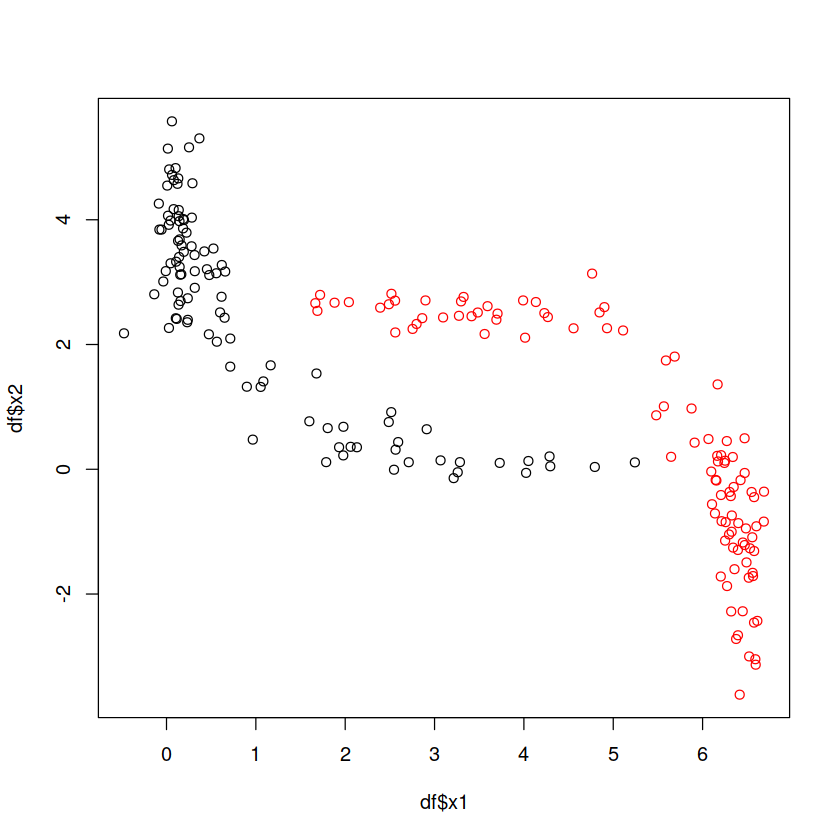

In [38]:
banana <- function(A, B, C1, C2, N, keep = 10, init = 10) {
    #' Simulate bivariate data from the "Banana" distribution
    #' (Meng and Barnard)
    R <- init * keep + N * keep
    x1 <- 0
    x2 <- 0
    bimat <- matrix(double(2 * N), ncol = 2)
    for (r in 1:R) {
        x1 <- rnorm(1,
                    mean = (B*x2 + C1) / (A * (x2^2) + 1),
                    sd = sqrt(1 / (A*(x2^2) + 1)))
        x2 <- rnorm(1,
                    mean = (B*x2 + C2) / (A * (x1^2) + 1),
                    sd = sqrt(1 / (A*(x1^2) + 1)))
        if (r > init * keep && r %% keep == 0) {
            mkeep <- r / keep
            bimat[mkeep - init, ] <- c(x1, x2)
        }
    }
    bimat
}

set.seed(2)
x1 <- banana(A = 2, B = 0, C1 = 3.7, C2 = 4, N = 100)
x2 <- banana(A = 2, B = 0, C1 = -4, C2 = -4, N = 100)
x2[, 1] <- x2[, 1] + 6.5
x2[, 2] <- x2[, 2] + 2.7
df <- data.frame(rbind(
    cbind(x1, y = 1),
    cbind(x2, y = 2)
))
df$y <- as.factor(df$y)
colnames(df) <- c("x1", "x2", "y")

plot(df$x1, df$x2, col = df$y)

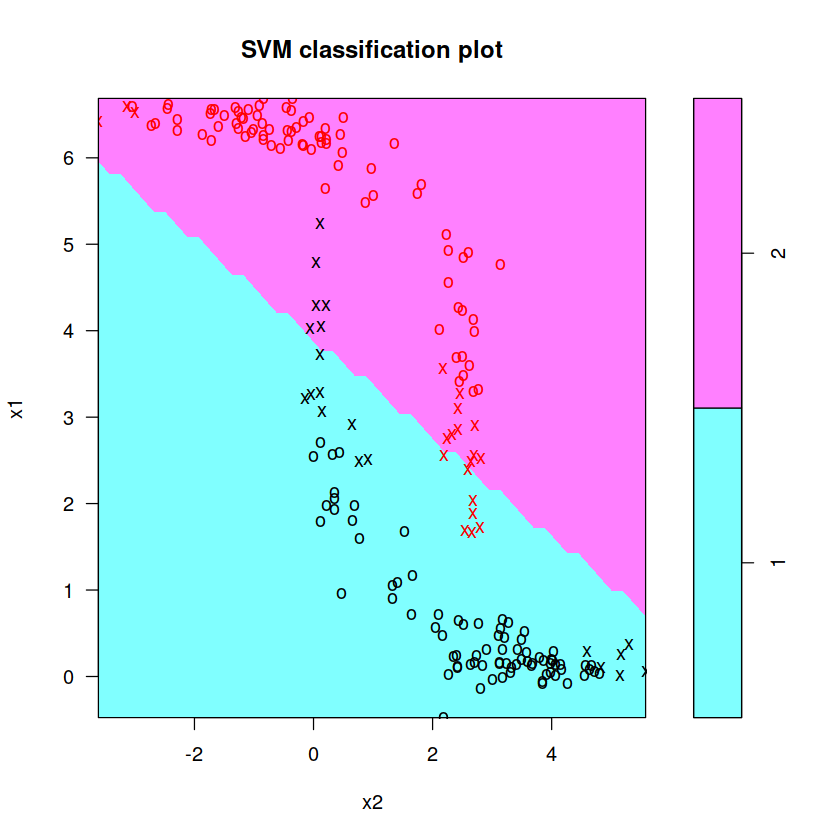

In [39]:
fit <- svm(y ~ ., data = df, kernel = "linear", cost = 1)
plot(fit, df)

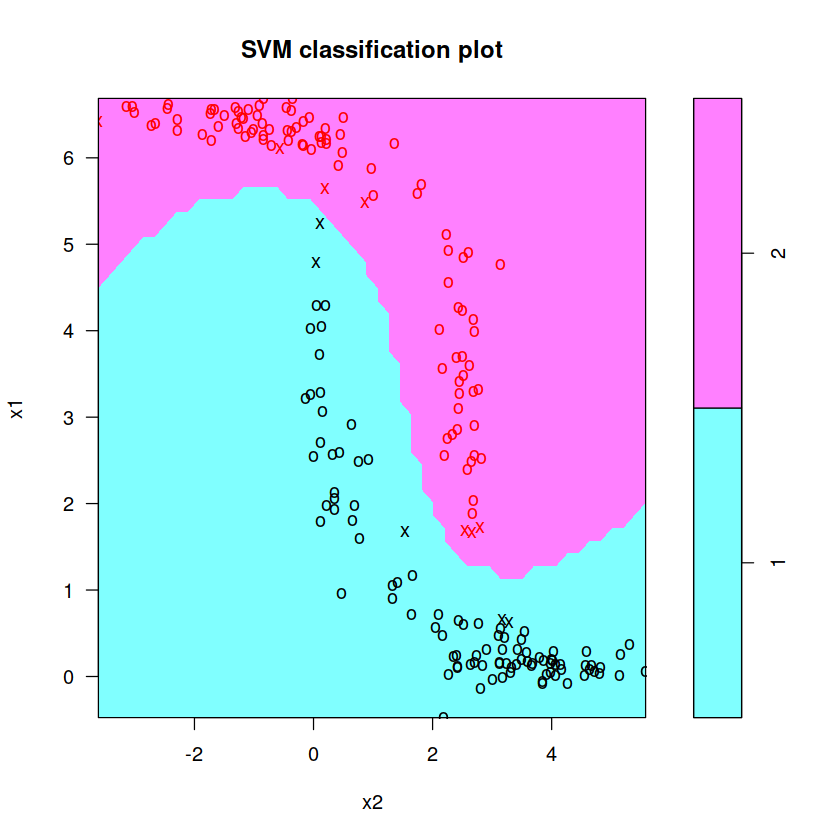

In [40]:
fit <- svm(y ~ ., data = df, kernel = "radial", cost = 10)
plot(fit, df)

I could not manage to make a polynomial model that would separate.

### Exercise 5

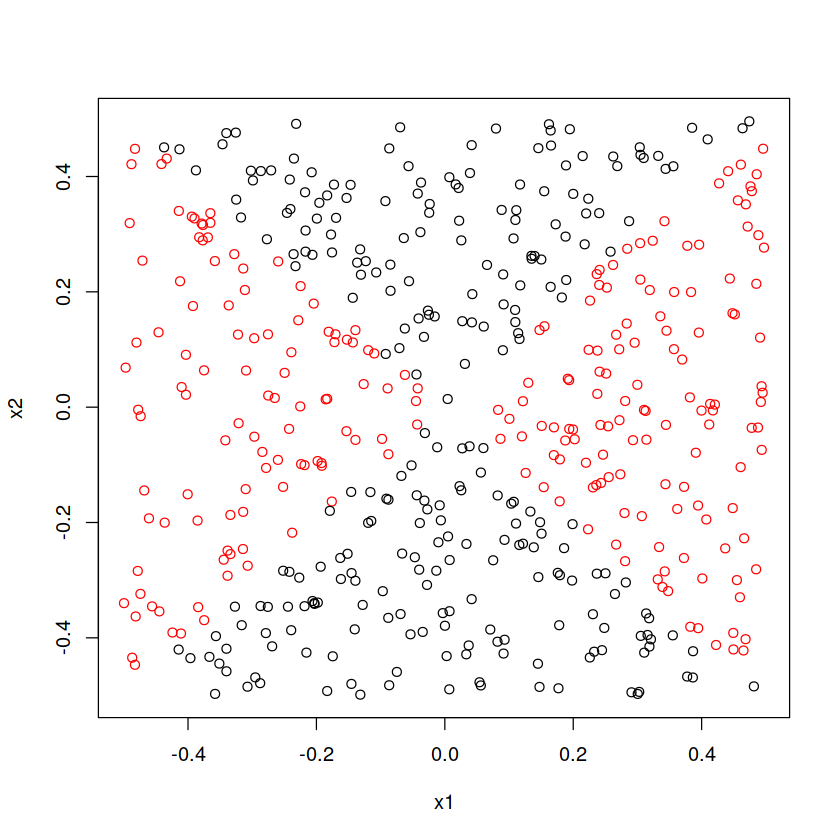

In [41]:
x1 <- runif(500) - 0.5
x2 <- runif(500) - 0.5
y <- 1 * (x1^2 - x2^2 > 0)

plot(x1, x2, col = y + 1)

In [42]:
fit <- glm(y ~ x1 + x2, family = binomial)
summary(fit)


Call:
glm(formula = y ~ x1 + x2, family = binomial)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.295  -1.125  -1.017   1.193   1.405  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.1290     0.0902  -1.430    0.153  
x1            0.5477     0.3261   1.680    0.093 .
x2            0.2846     0.3118   0.913    0.361  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 691.35  on 499  degrees of freedom
Residual deviance: 687.63  on 497  degrees of freedom
AIC: 693.63

Number of Fisher Scoring iterations: 4


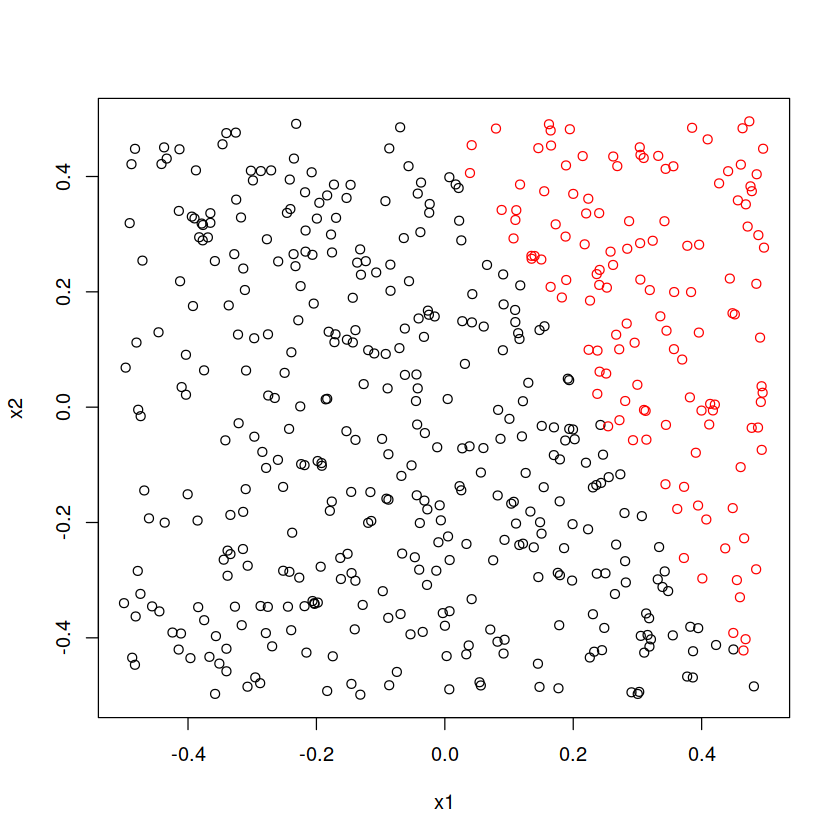

In [43]:
pred <- predict(fit, type = "response")
class <- as.integer(pred > 0.5)
plot(x1, x2, col = class + 1)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

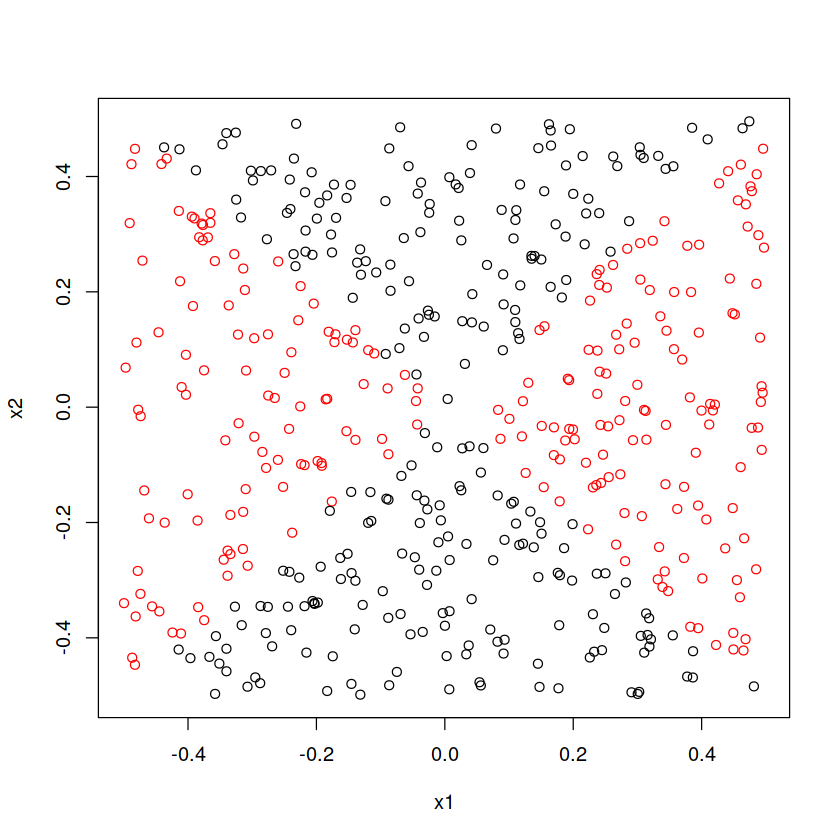

In [44]:
fit <- glm(y ~ poly(x1, 2) + poly(x2, 2), family = binomial)
pred <- predict(fit, type = "response")
class <- as.integer(pred > 0.5)
plot(x1, x2, col = class + 1)

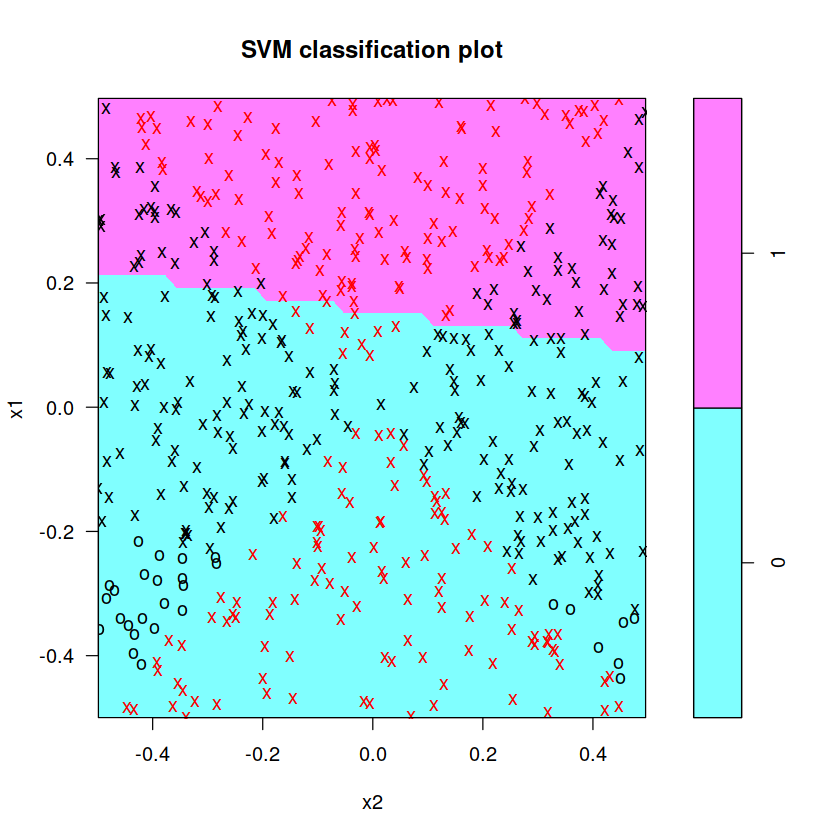

In [45]:
df <- data.frame(x1, x2, y = as.factor(y))
fit <- svm(y ~ x1 + x2, data = df, kernel = "linear")
plot(fit, df)

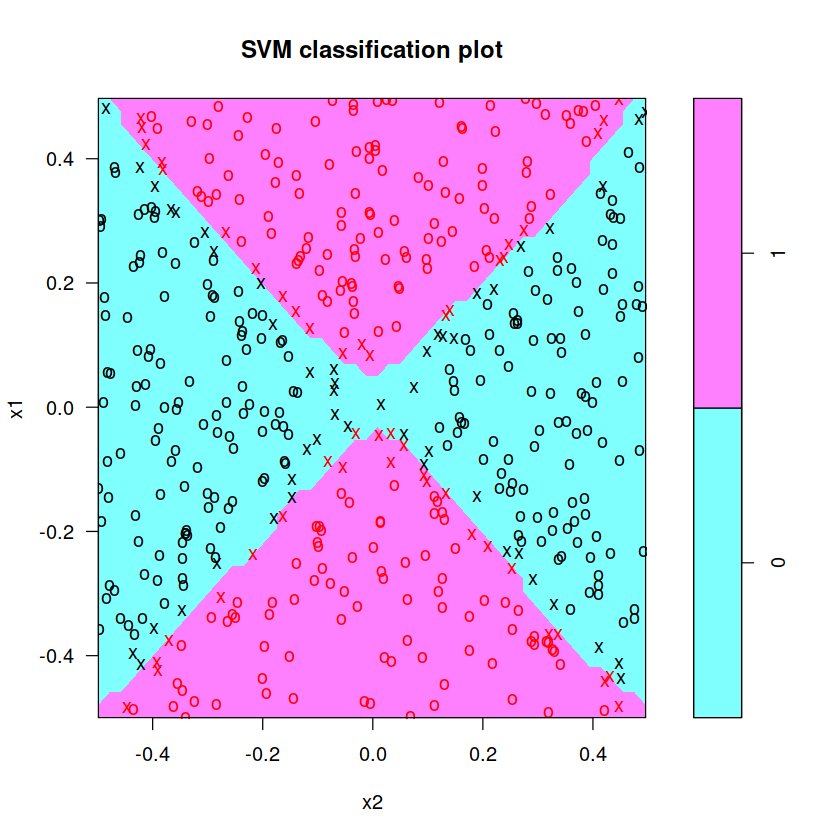

In [46]:
fit <- svm(y ~ x1 + x2, data = df, kernel = "radial",
           cost = 10)
plot(fit, df)

We can get the results of a nonlinear SVM with a logistic regression given that we know which transformations we should do on the data so that it can be linearly separable.

### Exercise 6

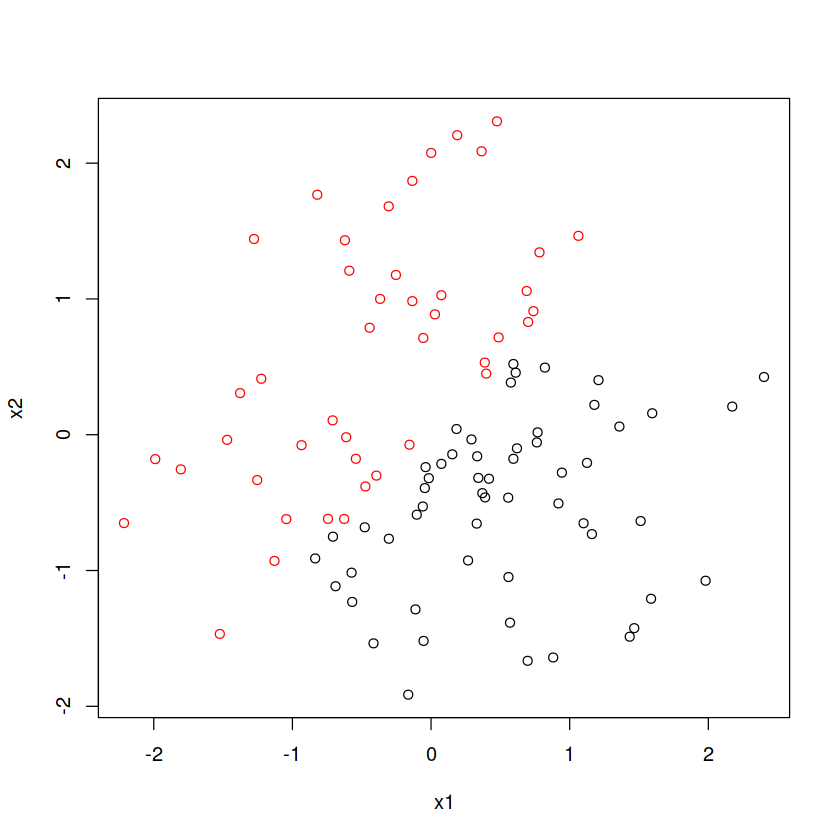

In [47]:
set.seed(1)
x1 <- rnorm(100)
x2 <- rnorm(100)
y <- as.factor(as.integer(x2 - x1 > 0))
dat <- data.frame(x1, x2, y)
plot(x1, x2, col = y)

In [48]:
table(y)

y
 0  1 
56 44 

In [49]:
set.seed(1)
tune.out <- tune(svm, y ~ ., data = dat, kernel = "linear",
                 ranges = list(cost = c(0.001, 0.01, 0.1,
                                        1, 5, 10, 100)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.01 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.44 0.18378732
2 1e-02  0.18 0.19888579
3 1e-01  0.12 0.17511901
4 1e+00  0.04 0.05163978
5 5e+00  0.02 0.04216370
6 1e+01  0.01 0.03162278
7 1e+02  0.01 0.03162278


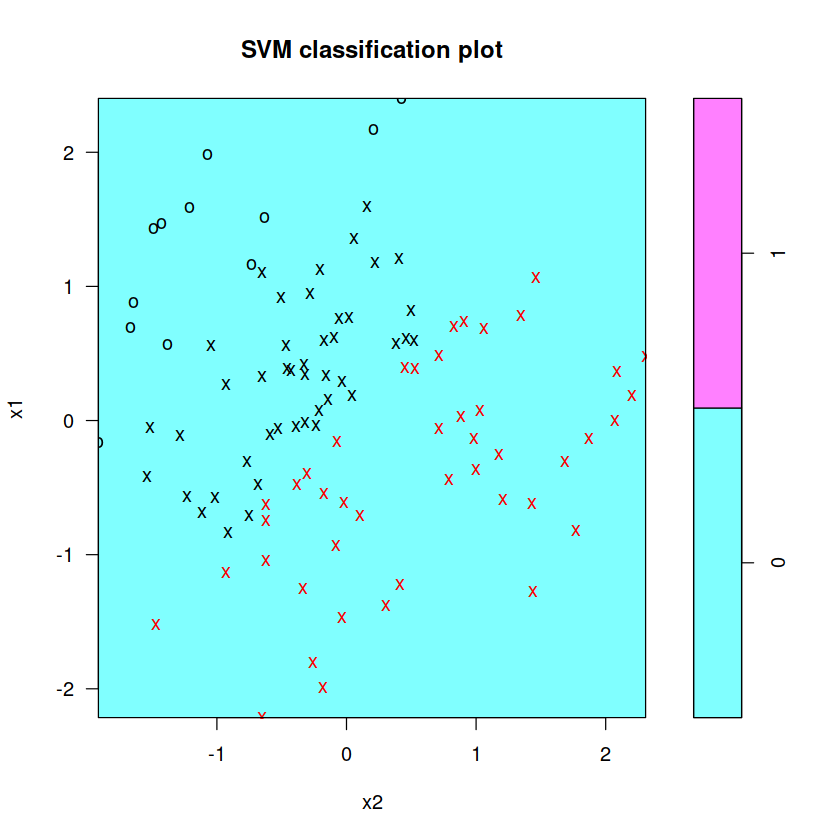

In [50]:
fit <- svm(y ~ ., data = dat, kernel = "linear",
           cost = 1e-3)
plot(fit, dat)

In [ ]:
fit <- svm(y ~ ., data = dat, kernel = "linear",
           cost = 1e-2)
plot(fit, dat)

In [ ]:
fit <- svm(y ~ ., data = dat, kernel = "linear",
           cost = 1e-1)
plot(fit, dat)

In [ ]:
fit <- svm(y ~ ., data = dat, kernel = "linear",
           cost = 1e-0)
plot(fit, dat)

In [ ]:
fit <- svm(y ~ ., data = dat, kernel = "linear",
           cost = 1e1)
plot(fit, dat)

In [ ]:
fit <- svm(y ~ ., data = dat, kernel = "linear",
           cost = 1e2)
plot(fit, dat)

In [ ]:
fit <- svm(y ~ ., data = dat, kernel = "linear",
           cost = 1e4)
plot(fit, dat)

In [ ]:
train <- sample(nrow(dat), nrow(dat) / 2)

In [ ]:
foreach(cost = c(1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000),
        .combine = "rbind") %do% {
    fit <- svm(y ~ ., data = dat, subset = train,
               kernel = "linear", cost = cost)
    pred <- predict(fit, newdata = dat[train, ])
    acc <- mean(pred == dat[train, ]$y)
    pred <- predict(fit, newdata = dat[-train, ])
    test.acc <- mean(pred == dat[-train, ]$y)
    data.frame(cost = cost, train = acc, test = test.acc)
}

The best cost for the test set is `10`.

### Exercise 7

**Auto** data set.

In [ ]:
y <- Auto$mpg > median(Auto$mpg)
df <- Auto
df[, "y"] <- factor(as.integer(y))

In [ ]:
names(Auto)

In [ ]:
foreach(cost = c(1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000),
        .combine = "rbind") %do% {
    fit <- svm(
    data = df, kernel = "linear", cost = cost)
    pred <- predict(fit, newdata = dat[train, ])
    acc <- mean(pred == dat[train, ]$y)
    pred <- predict(fit, newdata = dat[-train, ])
    test.acc <- mean(pred == dat[-train, ]$y)
    data.frame(cost = cost, train = acc, test = test.acc)
}

In [ ]:
set.seed(1)
tune.out <- tune(
    svm, 
    y ~ cylinders + displacement + horsepower
    + weight+ acceleration + year + origin,
    data = df,
    kernel = "linear",
    ranges = list(cost = c(0.001, 0.01, 0.1, 1, 5, 10, 
                           100, 1000)))
summary(tune.out)

A higher cost lead to a better 10-fold error or 8.7%.

In [ ]:
set.seed(1)
tune.out <- tune(
    svm, 
    y ~ cylinders + displacement + horsepower
    + weight+ acceleration + year + origin,
    data = df,
    kernel = "radial",
    ranges = list(
        cost = c(0.001, 0.01, 0.1, 1, 5, 10, 100, 1000),
        gamma = c(0.5, 1, 2, 3, 4)))
summary(tune.out)

A cost of 5 and $\gamma$ of 0.5 get an error of 7.4%, which is an improvement over the linear kernel that gets an error of 8.7%.

In [ ]:
set.seed(1)
tune.out <- tune(
    svm, 
    y ~ cylinders + displacement + horsepower
    + weight+ acceleration + year + origin,
    data = df,
    kernel = "polynomial",
    ranges = list(
        cost = c(0.1, 1, 5, 10, 100),
        degree = c(0.5, 1, 2, 3, 4, 5, 6)))
summary(tune.out)

#### Summary

Method | Accuracy error | Cost | Gamma | Degree
:--- | :--- | :--- | :--- | :---
Linear SVC | 8.7% | 100 | |
Radial SVM | 7.4% | 5 | 0.5 |
Polynomial SVM | 7.9% | 5 | | 3

In [ ]:
fit <- svm( 
    y ~ cylinders + displacement + horsepower
    + weight + acceleration + year + origin,
    data = df,
    kernel = "linear",
    cost = 100)
plot(fit, df, weight ~ year)

In [ ]:
fit <- svm( 
    y ~ cylinders + displacement + horsepower
    + weight + acceleration + year + origin,
    data = df,
    kernel = "radial",
    cost = 5,
    gamma = 0.5)
plot(fit, df, cylinders ~ horsepower)

In [ ]:
fit <- svm( 
    y ~ cylinders + displacement + horsepower
    + weight + acceleration + year + origin,
    data = df,
    kernel = "polynomial",
    cost = 5,
    degree = 3)
plot(fit, df, cylinders ~ horsepower)

### Exercise 8

**OJ** data set.

In [ ]:
set.seed(1)
train <- sample(nrow(OJ), 800)

In [ ]:
fit <- svm(Purchase ~ ., data = OJ, subset = train,
           kernel = "linear", cost = 0.01)
summary(fit)

In [ ]:
train.pred <- predict(fit)
test.pred <- predict(fit, OJ[-train, ])
train.acc <- mean(train.pred == OJ[train, ]$Purchase)
test.acc <- mean(test.pred == OJ[-train, ]$Purchase)
data.frame(train = train.acc, test = test.acc)

In [ ]:
set.seed(1)
tune.out <- tune(
    svm, 
    Purchase ~ .,
    data = OJ[train, ],
    kernel = "linear",
    ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 10)))
summary(tune.out)

The cost value didn’t change.

In [ ]:
fit <- svm(Purchase ~ ., data = OJ, subset = train,
           kernel = "radial", cost = 0.01)
summary(fit)

In [ ]:
train.pred <- predict(fit)
test.pred <- predict(fit, OJ[-train, ])
train.acc <- mean(train.pred == OJ[train, ]$Purchase)
test.acc <- mean(test.pred == OJ[-train, ]$Purchase)
data.frame(train = train.acc, test = test.acc)

In [ ]:
set.seed(1)
tune.out <- tune(
    svm, 
    Purchase ~ .,
    data = OJ[train, ],
    kernel = "radial",
    ranges = list(
        cost = c(0.01, 0.1, 1, 5, 10, 10),
        gamma = c(0.5, 1, 2, 3, 4)
    ))
summary(tune.out)

In [ ]:
fit <- svm(Purchase ~ ., data = OJ, subset = train,
           kernel = "radial", cost = 1, gamma = 0.5)
train.pred <- predict(fit)
test.pred <- predict(fit, OJ[-train, ])
train.acc <- mean(train.pred == OJ[train, ]$Purchase)
test.acc <- mean(test.pred == OJ[-train, ]$Purchase)
data.frame(train = train.acc, test = test.acc)

In [ ]:
fit <- svm(Purchase ~ ., data = OJ, subset = train,
           kernel = "polynomial", cost = 0.01,
           degree = 2)
train.pred <- predict(fit)
test.pred <- predict(fit, OJ[-train, ])
train.acc <- mean(train.pred == OJ[train, ]$Purchase)
test.acc <- mean(test.pred == OJ[-train, ]$Purchase)
data.frame(train = train.acc, test = test.acc)

In [ ]:
set.seed(1)
tune.out <- tune(
    svm, 
    Purchase ~ .,
    data = OJ[train, ],
    kernel = "polynomial",
    ranges = list(
        cost = c(0.01, 0.1, 1, 5, 10, 10),
        degree = c(0.5, 1, 2, 3, 4, 5)
    ))
summary(tune.out)

In [ ]:
fit <- svm(Purchase ~ ., data = OJ, subset = train,
           kernel = "polynomial", cost = 5,
           degree = 2)
train.pred <- predict(fit)
test.pred <- predict(fit, OJ[-train, ])
train.acc <- mean(train.pred == OJ[train, ]$Purchase)
test.acc <- mean(test.pred == OJ[-train, ]$Purchase)
data.frame(train = train.acc, test = test.acc)

Method | Train accuracy | Test accuracy | Cost | Degree | Gamma
:--- | :--- | :--- | :--- | :--- | :---
Linear SVC | 83.4% | 81.9% | 0.01 | | 
Radial SVM | 87.3% | 79.6% | 1 | | 0.5
Polynomial SVM | 85.1% | 81.9% | 5 | 2 | 

The Linear SVC seems to be the best model, because it its simpler and the train accuracy is closer to the test accuracy.